[ 모듈 로딩 ]

In [27]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

[ 영화 관객 수 데이터 불러오기 ]

In [28]:
conn = pymysql.connect(host = '172.20.95.116', user = 'emily0', password = '1234', db = 'leisure', charset = 'utf8')

cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('select * from movie_audience_number')
rows = cur.fetchall()

movie_audience_number = pd.DataFrame(rows)
cur.close()
conn.close()

In [29]:
movie_audience_number

,year,전국,서울특별시,경기도,부산광역시,대구광역시,경상남도,인천광역시,광주광역시,대전광역시,충청남도,전라북도,경상북도,충청북도,강원특별자치도,울산광역시,전라남도,제주특별자치도,세종특별자치시
0,2015,"217,299,066","59,131,105","49,252,926","16,907,521","12,403,565","11,193,343","10,634,584","8,194,922","7,856,722","6,805,497","6,680,558","6,347,384","5,695,693","4,972,158","4,556,196","4,109,176","2,174,209","383,507"
1,2016,"217,026,130","58,576,484","49,703,177","16,459,990","11,959,678","11,168,009","10,905,626","7,940,538","7,653,160","6,927,338","6,713,481","6,360,812","5,657,374","5,049,284","4,704,634","4,143,826","2,226,882","875,837"
2,2017,"219,876,227","58,091,548","51,184,071","16,417,281","11,615,625","11,589,481","11,351,714","8,104,842","7,582,262","7,130,799","6,583,070","6,684,116","5,718,326","5,411,459","4,686,906","4,518,634","2,263,104","942,989"
3,2018,"216,385,271","56,545,415","51,482,380","15,931,752","11,190,532","11,150,767","10,893,335","7,792,854","7,355,246","7,083,353","6,854,768","6,455,094","5,611,004","5,428,836","4,878,328","4,415,243","2,294,652","1,021,712"
4,2019,"226,678,228","57,794,448","55,034,457","15,886,034","11,716,115","11,667,096","11,623,897","8,057,107","7,775,386","7,444,349","7,329,539","6,881,160","6,159,735","5,737,572","5,094,530","4,820,125","2,474,155","1,182,523"
5,2020,"59,523,866","16,110,892","13,754,571","4,335,194","3,178,939","2,975,169","2,972,980","2,067,408","2,044,620","1,881,674","1,832,863","1,771,348","1,579,316","1,348,433","1,322,762","1,328,232","688,507","330,958"
6,2021,"60,531,076","16,933,155","14,410,251","4,278,846","2,944,914","2,964,597","2,790,336","2,111,192","2,041,248","1,995,104","1,884,578","1,787,107","1,543,033","1,326,928","1,253,331","1,235,735","655,279","375,442"
7,2022,"112,805,095","28,924,215","28,481,132","7,686,224","5,745,673","5,706,481","5,124,980","3,832,621","3,755,932","3,740,226","3,739,866","3,311,504","3,070,646","2,762,750","2,513,205","2,399,252","1,315,740","694,648"
8,2023,"125,136,265","32,436,238","31,876,534","8,448,818","6,353,595","6,121,102","5,741,552","4,161,800","4,160,281","4,148,649","4,095,241","3,561,110","3,297,126","3,028,887","2,797,542","2,589,021","1,492,714","826,055"
9,2024,"123,125,369","31,449,664","31,416,351","8,304,409","6,312,577","6,095,291","5,636,453","4,231,582","4,033,042","4,049,773","4,100,868","3,615,274","3,127,090","3,044,269","2,824,448","2,557,115","1,497,997","829,166"


1. 서울특별시부터 광주광역시 까지 연도별 영화 관객 수

In [30]:
Seoul_Gyeonggi = movie_audience_number.columns[2:4]

for col in Seoul_Gyeonggi:
    movie_audience_number[col] = movie_audience_number[col].str.replace(',', '').astype(int)

# 연도도 숫자로 변환
movie_audience_number['year'] = movie_audience_number['year'].astype(int)

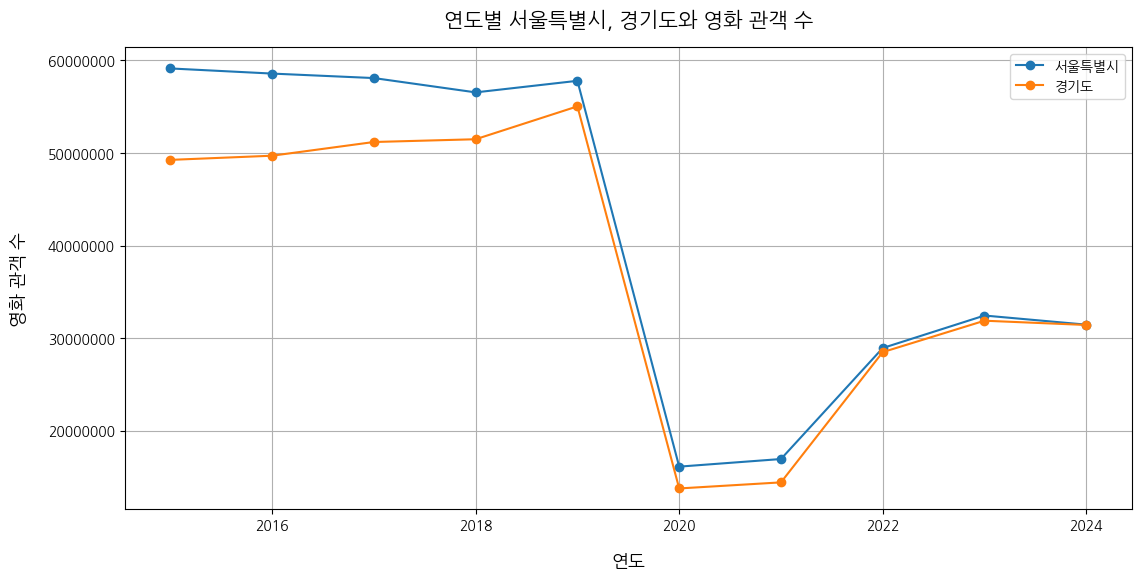

In [31]:
# 그래프 그리기
plt.figure(figsize=(13, 6))

# 각 도시별로 꺾은선 그래프 추가
for col in Seoul_Gyeonggi:
    plt.plot(movie_audience_number['year'], movie_audience_number[col], marker='o', label=col)

plt.ticklabel_format(style='plain') 

# 그래프 스타일 설정
plt.xlabel("연도", fontsize = 13, labelpad = 15)
plt.ylabel("영화 관객 수", fontsize = 13, labelpad = 15)
plt.title("연도별 서울특별시, 경기도와 영화 관객 수", fontsize = 15, pad = 15)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

2. 부산광역시부터 세종특별자치시까지의 연도별 영화 관객 수

In [32]:
Gwangju_Sejong = movie_audience_number.columns[4:]

for col in Gwangju_Sejong:
    movie_audience_number[col] = movie_audience_number[col].str.replace(',', '').astype(int)

# 연도도 숫자로 변환
movie_audience_number['year'] = movie_audience_number['year'].astype(int)

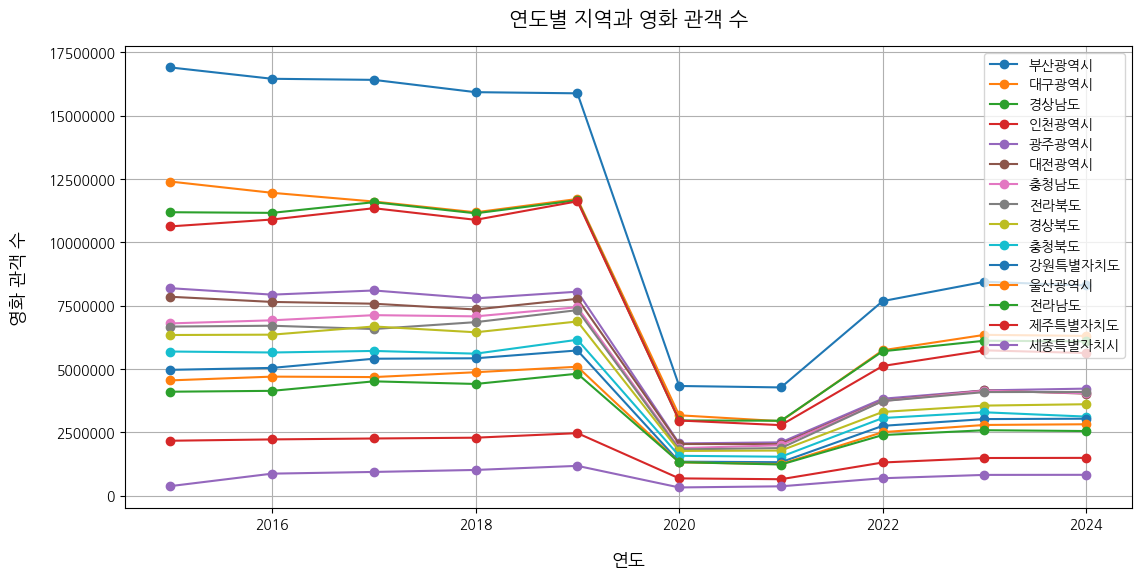

In [33]:
# 그래프 그리기
plt.figure(figsize=(13, 6))

# 각 도시별로 꺾은선 그래프 추가
for col in Gwangju_Sejong:
    plt.plot(movie_audience_number['year'], movie_audience_number[col], marker='o', label=col)

plt.ticklabel_format(style='plain') 

# 그래프 스타일 설정
plt.xlabel("연도", fontsize = 13, labelpad = 15)
plt.ylabel("영화 관객 수", fontsize = 13, labelpad = 15)
plt.title("연도별 지역과 영화 관객 수", fontsize = 15, pad = 15)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

3. 전국 연도별 영화 관객 수

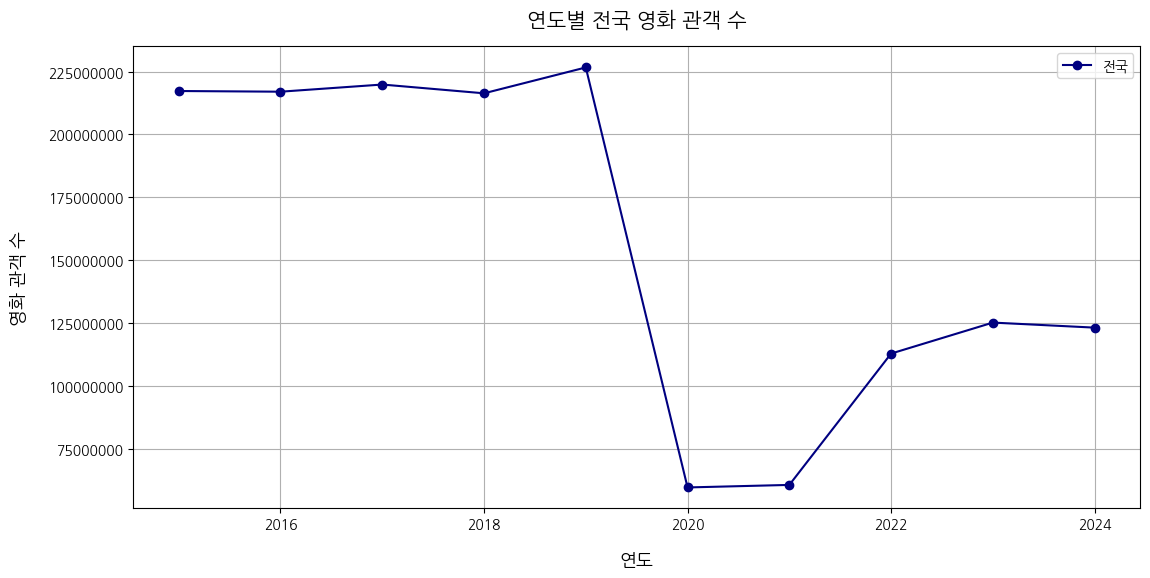

In [34]:
# 그래프 그리기
plt.figure(figsize=(13, 6))

movie_audience_number['전국'] = movie_audience_number['전국'].str.replace(',', '').astype(int)

# 연도도 숫자로 변환
movie_audience_number['전국'] = movie_audience_number['전국'].astype(int)
# 'year'와 '전국' 데이터로 꺾은선 그래프 그리기
plt.plot(movie_audience_number['year'], movie_audience_number['전국'], 'navy', marker='o', linestyle='-', label="전국")


# 숫자를 그대로 표시하도록 설정
plt.ticklabel_format(style='plain')

# 그래프 스타일 설정
plt.xlabel("연도", fontsize = 13, labelpad = 15)
plt.ylabel("영화 관객 수", fontsize = 13, labelpad = 15)
plt.title("연도별 전국 영화 관객 수", fontsize = 15, pad = 15)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

[ 연도별 실업률과 영화 관람객 수 ]

In [35]:
conn = pymysql.connect(host = '172.20.95.116', user = 'emily0', password = '1234', db = 'leisure', charset = 'utf8')

cur = conn.cursor(pymysql.cursors.DictCursor)

query = """
select u.year as 연도, u.전국 as 실업률, m.전국 as 영화관객수
from unemployment_data as u
inner join movie_audience_number as m
on u.year = m.year""" 

cur.execute(query)

rows = cur.fetchall()
unemploy_audience = pd.DataFrame(rows)
unemploy_audience
cur.close()
conn.close()

In [36]:
unemploy_audience

,연도,실업률,영화관객수
0,2015,3.6,"217,299,066"
1,2016,3.7,"217,026,130"
2,2017,3.7,"219,876,227"
3,2018,3.8,"216,385,271"
4,2019,3.8,"226,678,228"
5,2020,4.0,"59,523,866"
6,2021,3.7,"60,531,076"
7,2022,2.9,"112,805,095"
8,2023,2.7,"125,136,265"
9,2024,2.8,"123,125,369"


In [37]:
# 영화 관객 수 object --> int
unemploy_audience['영화관객수'] = unemploy_audience['영화관객수'].str.replace(',', '').astype(int)

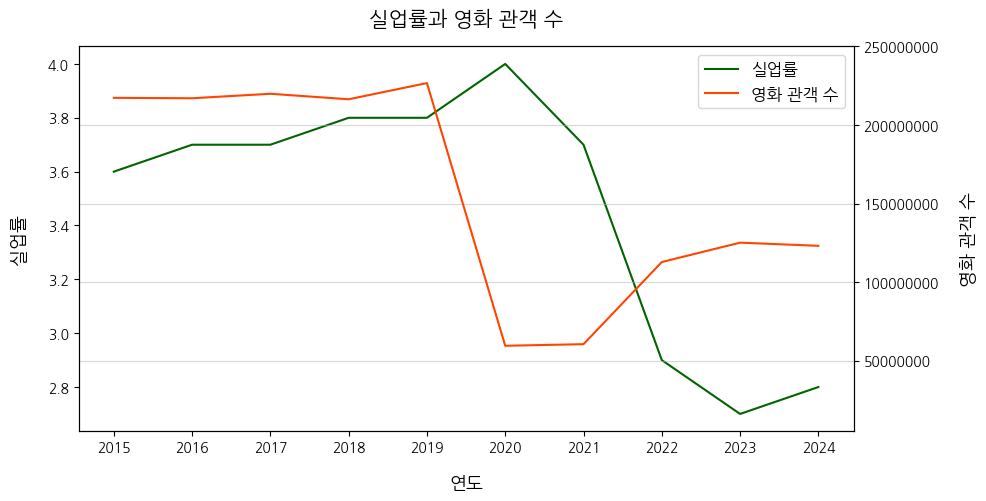

In [38]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(unemploy_audience['연도'], unemploy_audience['실업률'], 'darkgreen', label = '실업률')
ax1.set_xlabel('연도', fontsize = 13, labelpad = 15)
ax1.set_ylabel('실업률', color = 'black', fontsize = 13, labelpad = 15)

ax2 = ax1.twinx()
ax2.plot(unemploy_audience['연도'], unemploy_audience['영화관객수'], 'orangered', label = '영화 관객 수')
ax2.set_ylabel('영화 관객 수', color = 'black', fontsize = 13, labelpad = 15)

# 🔥 오른쪽 Y축 범위 조정
ax2.set_ylim(5_000_000, 250_000_000)


ax2.ticklabel_format(style='plain')  # 지수표현(1e8) 방지, 일반 숫자로 표시

lines1, labels1 = ax1.get_legend_handles_labels()  # 왼쪽 Y축 범례 정보 가져오기
lines2, labels2 = ax2.get_legend_handles_labels()  # 오른쪽 Y축 범례 정보 가져오기
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12, frameon=True)
  

plt.title('실업률과 영화 관객 수', pad = 15, fontsize = 15)
ax1.set_xticks(unemploy_audience['연도'])
plt.grid(True, alpha = 0.5)

plt.show()

[ 연도별 소비자 물가 지수와 영화 관람객 수 ]

In [39]:
conn = pymysql.connect(host = '172.20.95.116', user = 'emily0', password = '1234', db = 'leisure', charset = 'utf8')

cur = conn.cursor(pymysql.cursors.DictCursor)

query = """
select c.year, m.전국 as 영화관객수, c.소비자물가지수
from consumer_price_index as c
inner join movie_audience_number as m 
on c.year = m.year"""

cur.execute(query)

rows = cur.fetchall()
con_price_audience = pd.DataFrame(rows)
cur.close()
conn.close()

In [40]:
con_price_audience

,year,영화관객수,소비자물가지수
0,2015,"217,299,066",94.861
1,2016,"217,026,130",95.783
2,2017,"219,876,227",97.645
3,2018,"216,385,271",99.086
4,2019,"226,678,228",99.466
5,2020,"59,523,866",100.000
6,2021,"60,531,076",102.500
7,2022,"112,805,095",107.720
8,2023,"125,136,265",111.590
9,2024,"123,125,369",114.180


In [41]:
con_price_audience['영화관객수'] = con_price_audience['영화관객수'].str.replace(',', '').astype(int)

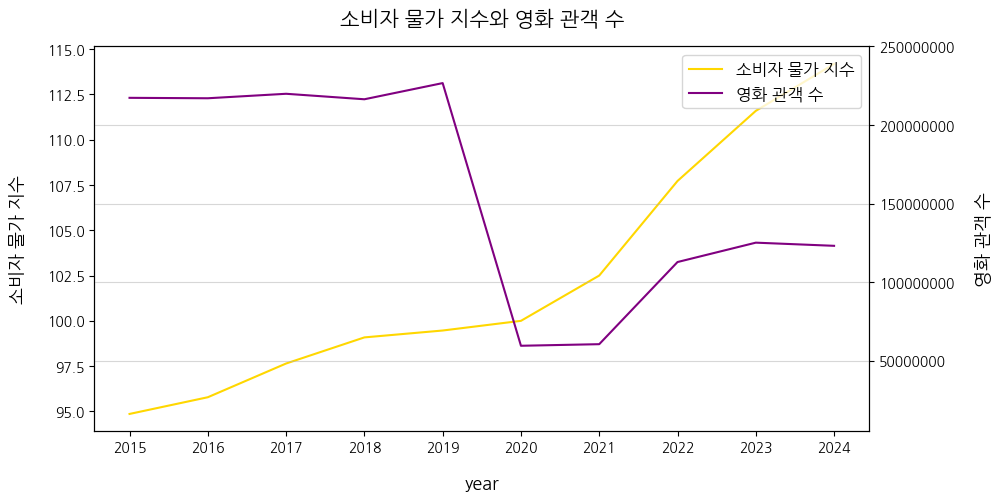

In [42]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(con_price_audience['year'], con_price_audience['소비자물가지수'], 'gold', label = '소비자 물가 지수')
ax1.set_xlabel('year', fontsize = 13, labelpad = 15)
ax1.set_ylabel('소비자 물가 지수', color = 'black', fontsize = 13, labelpad = 15)

ax2 = ax1.twinx()
ax2.plot(con_price_audience['year'], con_price_audience['영화관객수'], 'purple', label = '영화 관객 수')
ax2.set_ylabel('영화 관객 수', color = 'black', fontsize = 13, labelpad = 15)

# 🔥 오른쪽 Y축 범위 조정
ax2.set_ylim(5_000_000, 250_000_000)


ax2.ticklabel_format(style='plain')  # 지수표현(1e8) 방지, 일반 숫자로 표시

lines1, labels1 = ax1.get_legend_handles_labels()  # 왼쪽 Y축 범례 정보 가져오기
lines2, labels2 = ax2.get_legend_handles_labels()  # 오른쪽 Y축 범례 정보 가져오기
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12, frameon=True)
  

plt.title('소비자 물가 지수와 영화 관객 수', pad = 15, fontsize = 15)
ax1.set_xticks(con_price_audience['year'])
plt.grid(True, alpha = 0.5)

plt.show()

[ 소비자 물가 지수와 영화 관객 수 (영화관람료) ]

In [43]:
conn = pymysql.connect(host = '172.20.95.116', user = 'emily0', password = '1234', db = 'leisure', charset = 'utf8')

cur = conn.cursor(pymysql.cursors.DictCursor)

query = """
select con.year, mov.전국 as 영화관객수, con.영화소비자 as 소비자물가지수
from consumer_price_movie as con
inner join movie_audience_number as mov
on con.year = mov.year"""

cur.execute(query)

rows = cur.fetchall()
movie_price_audience = pd.DataFrame(rows)
cur.close()
conn.close()

In [44]:
movie_price_audience

,year,영화관객수,소비자물가지수
0,2015,"217,299,066",85.462
1,2016,"217,026,130",87.740
2,2017,"219,876,227",88.453
3,2018,"216,385,271",94.999
4,2019,"226,678,228",97.437
5,2020,"59,523,866",100.000
6,2021,"60,531,076",116.480
7,2022,"112,805,095",125.320
8,2023,"125,136,265",128.810
9,2024,"123,125,369",128.810


In [45]:
movie_price_audience['영화관객수'] = movie_price_audience['영화관객수'].str.replace(',', '').astype(int)

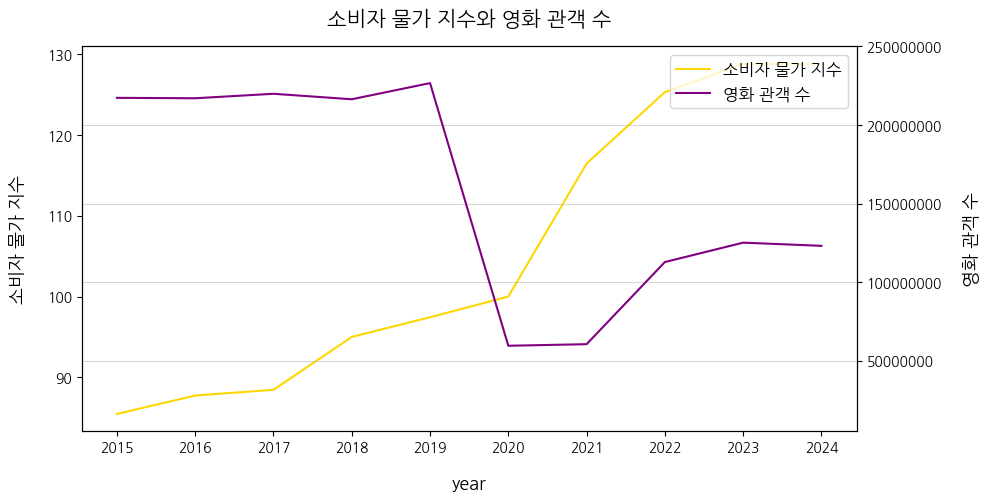

In [46]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(movie_price_audience['year'], movie_price_audience['소비자물가지수'], 'gold', label = '소비자 물가 지수')
ax1.set_xlabel('year', fontsize = 13, labelpad = 15)
ax1.set_ylabel('소비자 물가 지수', color = 'black', fontsize = 13, labelpad = 15)

ax2 = ax1.twinx()
ax2.plot(movie_price_audience['year'], movie_price_audience['영화관객수'], 'purple', label = '영화 관객 수')
ax2.set_ylabel('영화 관객 수', color = 'black', fontsize = 13, labelpad = 15)

# 🔥 오른쪽 Y축 범위 조정
ax2.set_ylim(5_000_000, 250_000_000)


ax2.ticklabel_format(style='plain')  # 지수표현(1e8) 방지, 일반 숫자로 표시

lines1, labels1 = ax1.get_legend_handles_labels()  # 왼쪽 Y축 범례 정보 가져오기
lines2, labels2 = ax2.get_legend_handles_labels()  # 오른쪽 Y축 범례 정보 가져오기
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12, frameon=True)
  

plt.title('소비자 물가 지수와 영화 관객 수', pad = 15, fontsize = 15)
ax1.set_xticks(movie_price_audience['year'])
plt.grid(True, alpha = 0.5)

plt.show()

[ 연도별 OTT이용자 수 ]

In [47]:
conn = pymysql.connect(host = '172.20.95.116', user = 'emily0', password = '1234', db = 'leisure', charset = 'utf8')

cur = conn.cursor(pymysql.cursors.DictCursor)

query ="""select ot.year, m.전국 as 영화관객수, ot.OTT이용자수
from ott_users_number as ot
inner join movie_audience_number as m
on ot.year = m.year"""

cur.execute(query)

rows = cur.fetchall()
ott_users_audience = pd.DataFrame(rows)
cur.close()
conn.close()

In [48]:
ott_users_audience

,year,영화관객수,OTT이용자수
0,2019,"226,678,228",893
1,2020,"59,523,866",1956
2,2021,"60,531,076",3013
3,2022,"112,805,095",2837
4,2023,"125,136,265",3057
5,2024,"123,125,369",3175


In [49]:
ott_users_audience['영화관객수'] = ott_users_audience['영화관객수'].str.replace(',', '').astype(int)

In [50]:
ott_users_audience

,year,영화관객수,OTT이용자수
0,2019,226678228,893
1,2020,59523866,1956
2,2021,60531076,3013
3,2022,112805095,2837
4,2023,125136265,3057
5,2024,123125369,3175


[ 그래프 ]

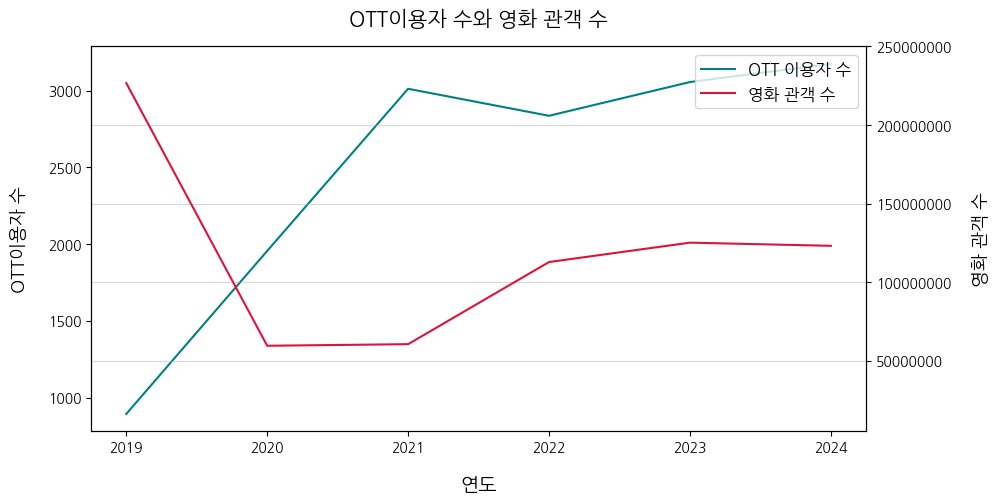

In [51]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(ott_users_audience['year'], ott_users_audience['OTT이용자수'], 'teal', label = 'OTT 이용자 수')
ax1.set_xlabel('연도', fontsize = 14, labelpad = 15)
ax1.set_ylabel('OTT이용자 수', color = 'black', fontsize = 13, labelpad = 15)

ax2 = ax1.twinx()
ax2.plot(ott_users_audience['year'], ott_users_audience['영화관객수'], 'crimson', label = '영화 관객 수')
ax2.set_ylabel('영화 관객 수', color = 'black', fontsize = 13, labelpad = 15)

ax2.set_ylim(5_000_000, 250_000_000)


ax2.ticklabel_format(style='plain')  # 지수표현(1e8) 방지, 일반 숫자로 표시

lines1, labels1 = ax1.get_legend_handles_labels()  # 왼쪽 Y축 범례 정보 가져오기
lines2, labels2 = ax2.get_legend_handles_labels()  # 오른쪽 Y축 범례 정보 가져오기
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12, frameon=True)

plt.title('OTT이용자 수와 영화 관객 수', fontsize = 15, pad = 15)
ax1.set_xticks(ott_users_audience['year'])
plt.grid(True, alpha = 0.5)

plt.show()

[ 상관관계 ]

In [52]:
corr_unemploy = unemploy_audience['실업률'].corr(unemploy_audience['영화관객수'])
corr_unemploy

0.2623839658058617

In [53]:
corr_price = con_price_audience['소비자물가지수'].corr(con_price_audience['영화관객수'])
corr_price

-0.5466759323883073

In [54]:
corr_price_movie = movie_price_audience['소비자물가지수'].corr(movie_price_audience['영화관객수'])
corr_price_movie

-0.6825149945411912

In [55]:
corr_ott = ott_users_audience['OTT이용자수'].corr(ott_users_audience['영화관객수'])
corr_ott

-0.6087666449376883

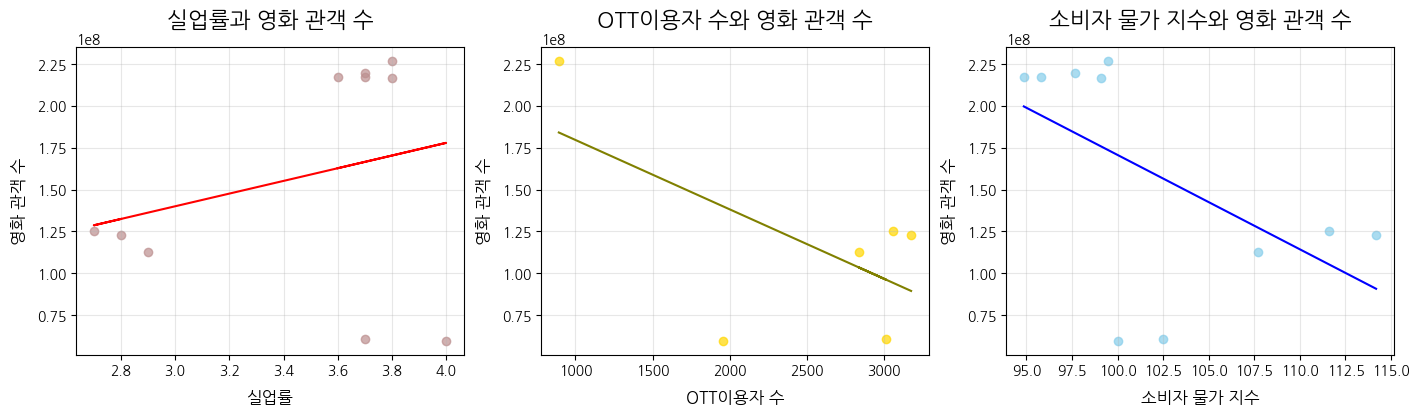

In [56]:
# 첫 번째 그래프
fig, axes = plt.subplots(1, 3, figsize=(17, 4))

axes[0].scatter(unemploy_audience["실업률"], unemploy_audience["영화관객수"], color = "rosybrown", alpha = 0.7)
axes[0].set_title("실업률과 영화 관객 수", fontsize = 16, pad = 15)
axes[0].set_xlabel("실업률", fontsize = 12, labelpad = 8)
axes[0].set_ylabel("영화 관객 수", fontsize = 12, labelpad = 8)
axes[0].grid(alpha = 0.3)

# 회귀선 계산
x = unemploy_audience["실업률"]
y = unemploy_audience["영화관객수"]
coefficients = np.polyfit(x, y, 1)  # 1차 다항식(직선) 회귀
regression_line = np.poly1d(coefficients)

# 회귀선 그리기
axes[0].plot(x, regression_line(x), color = "red")



# 두 번째 그래프
axes[1].scatter(ott_users_audience["OTT이용자수"], ott_users_audience["영화관객수"], color = "gold", alpha = 0.7)
axes[1].set_title("OTT이용자 수와 영화 관객 수", fontsize = 16, pad = 15)
axes[1].set_xlabel("OTT이용자 수", fontsize = 12, labelpad = 8)
axes[1].set_ylabel("영화 관객 수", fontsize = 12, labelpad = 8)
axes[1].grid(alpha = 0.3)

# 회귀선 계산
x = ott_users_audience["OTT이용자수"]
y = ott_users_audience["영화관객수"]
coefficients = np.polyfit(x, y, 1)  # 1차 다항식(직선) 회귀
regression_line = np.poly1d(coefficients)

# 회귀선 그리기
axes[1].plot(x, regression_line(x), color = "olive")


# 세 번째 그래프
axes[2].scatter(con_price_audience["소비자물가지수"], con_price_audience["영화관객수"], color = "skyblue", alpha = 0.7)
axes[2].set_title("소비자 물가 지수와 영화 관객 수", fontsize = 16, pad = 15)
axes[2].set_xlabel("소비자 물가 지수", fontsize = 12, labelpad = 8)
axes[2].set_ylabel("영화 관객 수", fontsize = 12, labelpad = 8)
axes[2].grid(alpha = 0.3)

# 회귀선 계산
x = con_price_audience["소비자물가지수"]
y = con_price_audience["영화관객수"]
coefficients = np.polyfit(x, y, 1)  # 1차 다항식(직선) 회귀
regression_line = np.poly1d(coefficients)


# 회귀선 그리기
axes[2].plot(x, regression_line(x), color = "blue")

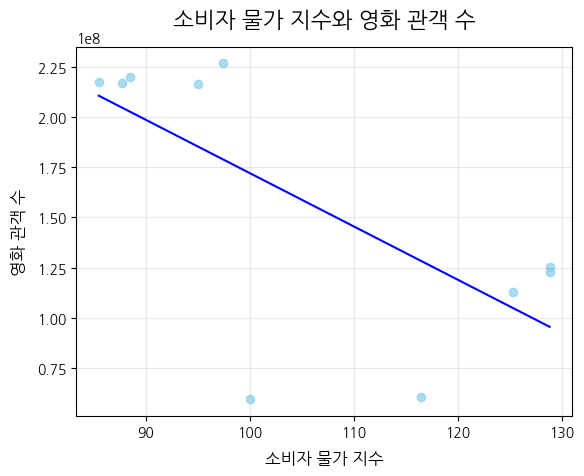

In [58]:
# 네 번째 그래프
plt.scatter(movie_price_audience["소비자물가지수"], movie_price_audience["영화관객수"], color = "skyblue", alpha = 0.7)
plt.title("소비자 물가 지수와 영화 관객 수", fontsize = 16, pad = 15)
plt.xlabel("소비자 물가 지수", fontsize = 12, labelpad = 8)
plt.ylabel("영화 관객 수", fontsize = 12, labelpad = 8)
plt.grid(alpha = 0.3)

# 회귀선 계산
x = movie_price_audience["소비자물가지수"]
y = movie_price_audience["영화관객수"]
coefficients = np.polyfit(x, y, 1)  # 1차 다항식(직선) 회귀
regression_line = np.poly1d(coefficients)


# 회귀선 그리기
plt.plot(x, regression_line(x), color = "blue")